In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

# show plots inline
%matplotlib inline

In [2]:
# get data and show some records
data = pd.read_csv('./iris.csv')
data = data.drop('Id', axis=1) # get rid of the Id column - don't need it
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
X = data.iloc[:,0:4]
y = data.iloc[:,-1]
print(X.sample(5))
print(y.sample(5))

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
50             7.0           3.2            4.7           1.4
7              5.0           3.4            1.5           0.2
119            6.0           2.2            5.0           1.5
56             6.3           3.3            4.7           1.6
83             6.0           2.7            5.1           1.6
89     versicolor
18         setosa
1          setosa
134     virginica
65     versicolor
Name: Species, dtype: object


In [4]:
data["Species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

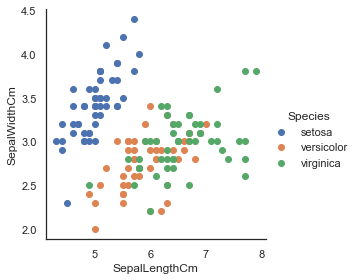

In [5]:
sns.FacetGrid(data, hue="Species", size=4) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend();

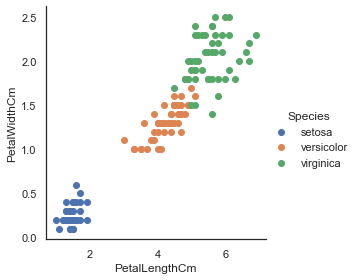

In [6]:
sns.FacetGrid(data, hue="Species", size=4) \
   .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
   .add_legend();

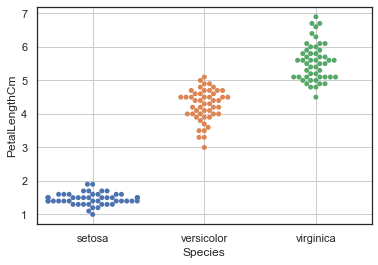

In [7]:
sns.swarmplot(x="Species", y="PetalLengthCm", data=data)
plt.grid()

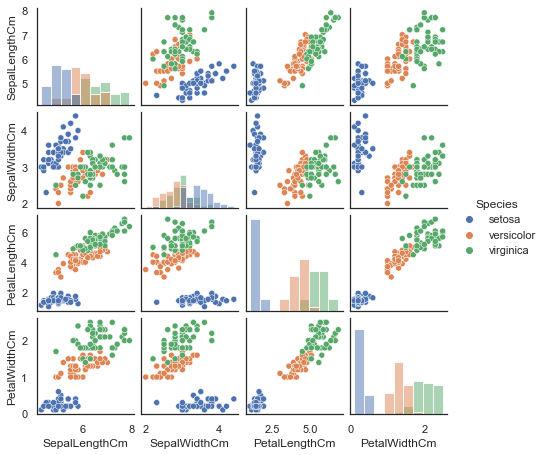

In [8]:
sns.pairplot(data, hue="Species", diag_kind="hist", size=1.6);


In [9]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

scaler.fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)

X_scaled.sample(5)



,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
105,2.128516,-0.131979,1.615320,1.185567
109,1.643844,1.249201,1.331133,1.712096
30,-1.264185,0.098217,-1.226552,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
133,0.553333,-0.592373,0.762758,0.395774


In [10]:
X_scaled_two_col = X_scaled.iloc[:,2:]
X_scaled_two_col.sample(5)

,PetalLengthCm,PetalWidthCm
0,-1.340227,-1.315444
70,0.592246,0.790671
38,-1.397064,-1.315444
17,-1.340227,-1.183812
5,-1.169714,-1.052180


In [11]:
from sklearn.cluster import KMeans

nclusters = 3 # this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X_scaled_two_col)#试试 X_scaled_two_col

# predict the cluster for each data point
y_cluster_kmeans = km.predict(X_scaled_two_col)#试试 X_scaled_two_col
y_cluster_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [12]:
from sklearn import metrics


score = metrics.silhouette_score(X_scaled_two_col, y_cluster_kmeans)#试试 X_scaled_two_col
score

0.6741313115143868

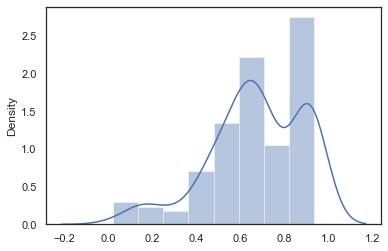

In [13]:
scores = metrics.silhouette_samples(X_scaled_two_col, y_cluster_kmeans)#试试 X_scaled_two_col
sns.distplot(scores);


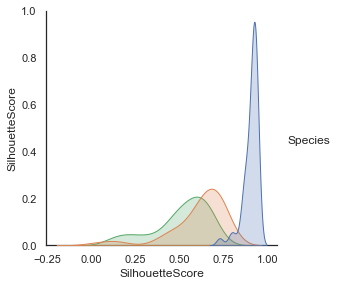

In [14]:
df_scores = pd.DataFrame()
df_scores['SilhouetteScore'] = scores
df_scores['Species'] = data['Species']
sns.pairplot(df_scores, hue="Species", size=4);


In [15]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=nclusters)
gmm.fit(X_scaled_two_col)#试试 X_scaled_two_col

# predict the cluster for each data point
y_cluster_gmm = gmm.predict(X_scaled_two_col)#试试 X_scaled_two_col
y_cluster_gmm

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [16]:
score = metrics.silhouette_score(X_scaled_two_col, y_cluster_gmm)#试试 X_scaled_two_col
score

0.665476483215171

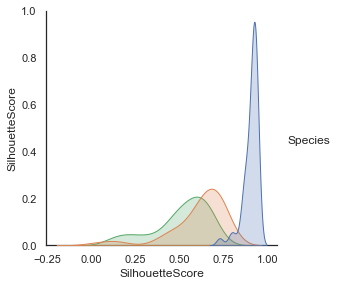

In [17]:
df_scores = pd.DataFrame()
df_scores['SilhouetteScore'] = scores
df_scores['Species'] = data['Species']
sns.pairplot(df_scores, hue="Species", size=4);

In [18]:
from sklearn.metrics.cluster import adjusted_rand_score
score = adjusted_rand_score(y, y_cluster_kmeans)
score

0.8856970310281228

In [19]:
score = adjusted_rand_score(y, y_cluster_gmm)
score

0.9410122562924206